# FIFA EDA
___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected= True)
cf.go_offline()

## Data Import
___________________________

In [2]:
worldcup = pd.read_csv("WorldCups.csv")
players = pd.read_csv('WorldCupPlayers.csv')
matches = pd.read_csv('WorldCupMatches.csv')

---
## Data Cleaning
---

In [3]:
matches.dropna(subset=['Year'], inplace=True)

In [4]:
matches['Home Team Name'].value_counts()

Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: Home Team Name, Length: 78, dtype: int64

In [5]:
matches[matches["Home Team Name"].str.contains('rn">')]['Home Team Name'].value_counts()

rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: Home Team Name, dtype: int64

In [6]:
matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [7]:
incorrect= matches[matches["Away Team Name"].str.contains('rn">')]['Away Team Name'].value_counts()

In [8]:
wrong= list(incorrect.index)

In [9]:
correct = [name.split('>')[1] for name in wrong]

In [10]:
matches[matches.Stadium.str.contains('Mara')]["Stadium"].value_counts()

Estadio do Maracana                          10
Maracan� - Est�dio Jornalista M�rio Filho     8
Name: Stadium, dtype: int64

In [11]:
old= ['Germany FR','Maracan� - Est�dio Jornalista M�rio Filho']
new = ['Germany', 'Estadio do Maracana']

In [12]:
wrong=  wrong + old
correct = correct + new

In [13]:
for index, wr in enumerate(wrong):
    worldcup = worldcup.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    players = players.replace(wrong[index], correct[index])

In [14]:
matches[matches.Stadium.str.contains('Mara')]["Stadium"].value_counts()

Estadio do Maracana    18
Name: Stadium, dtype: int64

---
## Most World Cup Titles
___

In [15]:
worldcup.columns

Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')

In [16]:
winner = worldcup['Winner'].value_counts()

In [17]:
runnerup= worldcup['Runners-Up'].value_counts()

In [18]:
third = worldcup['Third'].value_counts()
third

Germany        4
Brazil         2
Sweden         2
France         2
Poland         2
USA            1
Austria        1
Chile          1
Portugal       1
Italy          1
Croatia        1
Turkey         1
Netherlands    1
Name: Third, dtype: int64

In [19]:
wTeams = pd.concat([winner, runnerup, third], axis=1)
wTeams.fillna(0, inplace=True)
wTeams= wTeams.astype(int)

In [20]:
wTeams.iplot(kind='bar', xTitle='Countries', yTitle='Wins', title='FIFA World Cup Win Counts')

---
## Number of Goals Per Country
---

In [21]:
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

In [22]:
home.columns = ['Countries','Goals']
away.columns = home.columns

In [23]:
goals = home.append(away, ignore_index= True)

In [24]:
goals = goals.groupby('Countries').sum()
goals = goals.sort_values('Goals',ascending= False)

In [25]:
goals[:20].iplot(kind= 'bar', xTitle= "Country", yTitle= "Goals", title= 'Top 20 Goals')

---
## Game Stat Analysis
---
### Attendance
___

In [26]:
worldcup['Attendance'] = worldcup['Attendance'].str.replace(".",'')

C:\Users\HCad\AppData\Local\Temp/ipykernel_7836/3618344599.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [27]:
worldcup['Year']= pd.to_datetime(worldcup['Year'],format='%Y').dt.year

In [28]:
worldcup['Attendance'] = worldcup['Attendance'].astype('int64')

In [29]:
worldcup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


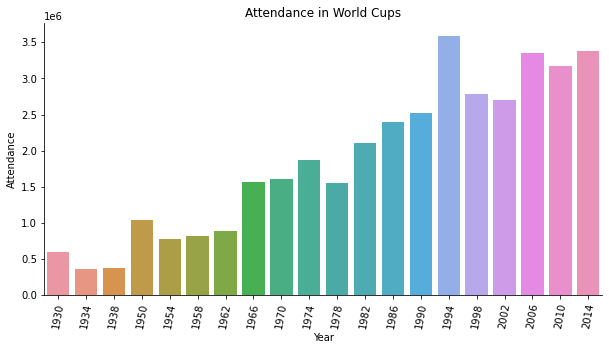

In [30]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right= True)

g=sns.barplot(x= 'Year', y='Attendance', data=worldcup)
g.set_xticklabels(g.get_xticklabels(),rotation= 80)
g.set_title('Attendance in World Cups')

##############
plt.show()

___
### Qualified Teams
---

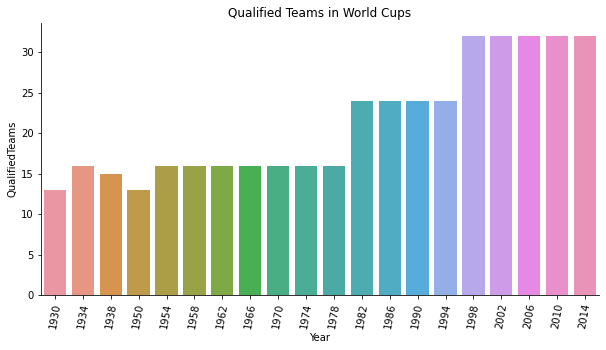

In [31]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right= True)

g=sns.barplot(x= 'Year', y='QualifiedTeams', data=worldcup)
g.set_xticklabels(g.get_xticklabels(),rotation= 80)
g.set_title('Qualified Teams in World Cups')
plt.show()

In [32]:
worldcup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 1.7+ KB


In [33]:
worldcup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


---
### Goals Scored
---

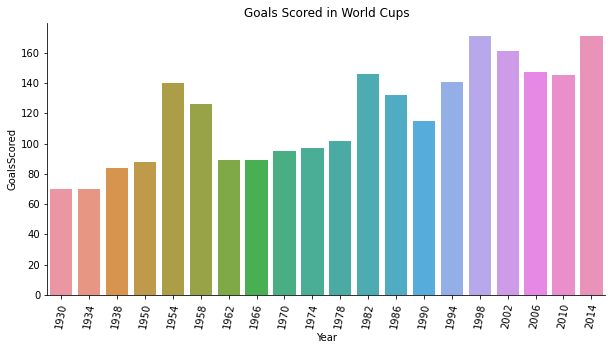

In [34]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right= True)

g=sns.barplot(x= 'Year', y='GoalsScored', data=worldcup)
g.set_xticklabels(g.get_xticklabels(),rotation= 80)
g.set_title('Goals Scored in World Cups')
plt.show()

---
### Matched Played
---

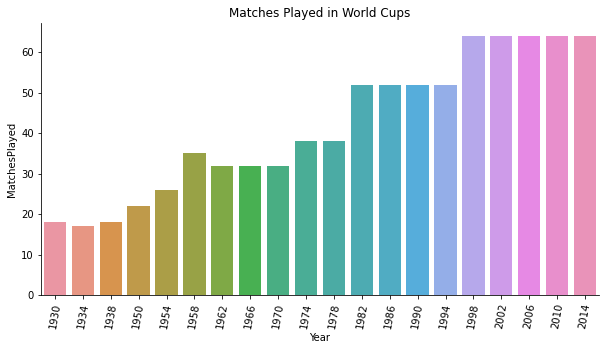

In [35]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right= True)

g=sns.barplot(x= 'Year', y='MatchesPlayed', data=worldcup)
g.set_xticklabels(g.get_xticklabels(),rotation= 80)
g.set_title('Matches Played in World Cups')
plt.show()

---
## Goal Statistics
---

In [36]:
matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [37]:
home= matches.groupby(['Year','Home Team Name'])['Home Team Goals'].sum()
away= matches.groupby(['Year','Away Team Name'])['Away Team Goals'].sum()

In [38]:
golas = pd.concat([home, away], axis=1)

In [39]:
golas.fillna(0,inplace=True)

In [40]:
golas['Goals'] = golas['Home Team Goals'] + golas['Away Team Goals']
golas = golas.drop(labels=['Home Team Goals', 'Away Team Goals'], axis= 1)
golas

Goals
Year                     
1930.0 Argentina     18.0
       Belgium        0.0
       Bolivia        0.0
       Brazil         5.0
       Chile          5.0
...                   ...
2014.0 Russia         2.0
       Spain          4.0
       Switzerland    7.0
       USA            6.0
       Uruguay        4.0

[427 rows x 1 columns]

In [41]:
golas = golas.reset_index()
golas.columns= ['Year', "Country", 'Goals']
golas= golas.sort_values(by=["Year", "Goals"], ascending=[True, False])
golas

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
...,...,...,...
416,2014.0,Japan,2.0
422,2014.0,Russia,2.0
401,2014.0,Cameroon,1.0
413,2014.0,Honduras,1.0


In [42]:
top5= golas.groupby('Year').head(5)

In [43]:
import plotly.graph_objects as go

In [44]:
x, y = golas['Year'].values, golas['Goals'].values

In [45]:
data= []
for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country'] == team]['Year']
    goal = top5[top5['Country'] == team]['Goals']
    
    data.append(go.Bar(x=year, y=goal, name= team))
    
layout = go.Layout(barmode= 'stack', title= 'Top 5 Teams with Most Goals', showlegend= False)
fig= go.Figure(data= data, layout= layout)

fig.show()

---
## Match Attendance
___

In [46]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [48]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2           8

In [49]:
matches['Datetime'] = pd.to_datetime(matches['Datetime'])

In [54]:
matches["Datetime"] = matches['Datetime'].apply(lambda x: x.strftime('%d %b, %Y'))

In [55]:
matches['Datetime']

0      13 Jul, 1930
1      13 Jul, 1930
2      14 Jul, 1930
3      14 Jul, 1930
4      15 Jul, 1930
           ...     
847    05 Jul, 2014
848    08 Jul, 2014
849    09 Jul, 2014
850    12 Jul, 2014
851    13 Jul, 2014
Name: Datetime, Length: 852, dtype: object

In [59]:
top10m = matches.sort_values(by='Attendance', ascending= False)[:10]

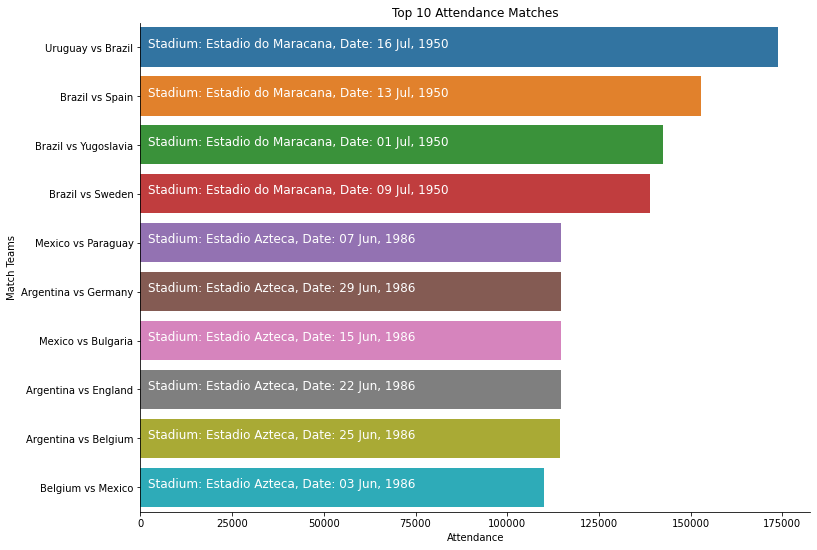

In [65]:
top10m['vs']= top10m['Home Team Name'] + " vs " +top10m['Away Team Name']

plt.figure(figsize = (12,9))


ax = sns.barplot(y= top10m['vs'], x=top10m['Attendance'])
sns.despine(right= True)

plt.ylabel('Match Teams')
plt.xlabel('Attendance')
plt.title("Top 10 Attendance Matches")

for i, s in enumerate("Stadium: "+ top10m['Stadium']+ ", Date: " + top10m['Datetime']):
    ax.text(2000, i, s, fontsize=12, color= 'white')

plt.show()

---
### Average Attendance Analysis
___

In [66]:
matches['Year'] = matches['Year'].astype(int)

std = matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by= 'Attendance',ascending= False)[:10]

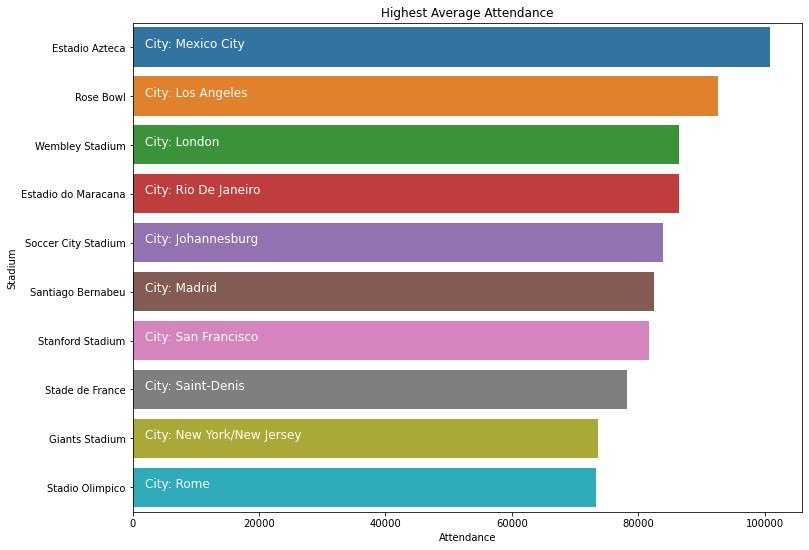

In [69]:
plt.figure(figsize=(12,9))
ax = sns.barplot(y=std['Stadium'], x= std['Attendance'])
plt.title("Highest Average Attendance")

for i, s in enumerate("City: "+ std['City']):
    ax.text(2000, i, s, fontsize=12, color= 'white')

plt.show()

In [70]:
matches["City"].value_counts()[:20].iplot(kind='bar')

---
## Home vs Away Match Outcomes
___

In [71]:
def get_labels(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return 'Home Team Win'
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return 'Away Team Win'
    return 'Draw'

In [74]:
matches['outcome']= matches.apply(lambda x: get_labels(x), axis= 1)

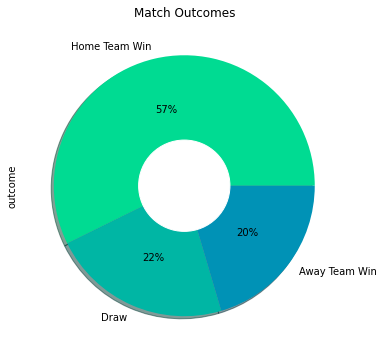

In [76]:
plt.figure(figsize= (6,6))
mt = matches['outcome'].value_counts()

mt.plot.pie(autopct= '%1.0f%%', colors= sns.color_palette('winter_r'), shadow= True)

c= plt.Circle((0,0), 0.35, color= 'white')
plt.gca().add_artist(c)
plt.title('Match Outcomes')
plt.show()